<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment/S_A3_LS_DS18_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-08 18:32:39--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.250.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.250.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.1MB/s    in 4.7s    

2020-07-08 18:32:44 (41.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [ ]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [ ]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [ ]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [ ]:
##### YOUR CODE HERE #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [ ]:
order_products__prior = pd.read_csv('order_products__prior.csv')

print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products__train = pd.read_csv('order_products__train.csv')

print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
orders = pd.read_csv('orders.csv')

print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
products = pd.read_csv('products.csv')

print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
# We can concate order_products__prior with order_products__train
order_products = pd.concat([order_products__prior, order_products__train])

print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
# look at the shape for both dataframe
order_products__prior.shape[0] + order_products__train.shape[0]

33819106

In [ ]:
# We can filter by passing a condition  
orders[orders['order_id'] <= 5]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [ ]:
 # Using subset tabe of order
orders_subset = orders[(orders['user_id'] == 1) & (orders['order_number'] <= 2)]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [ ]:
# bitwise or operator
order_products_subset = order_products[(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)]

order_products_subset

,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [ ]:
# merage the above table together
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [ ]:
# Remove columns that we don't need
orders_and_products = orders_and_products.drop(['eval_set', 'days_since_prior_order', 'reordered'], axis=1)

orders_and_products

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5
5,2398795,1,2,3,7,196,1
6,2398795,1,2,3,7,10258,2
7,2398795,1,2,3,7,12427,3
8,2398795,1,2,3,7,13176,4
9,2398795,1,2,3,7,26088,5


In [ ]:
condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [ ]:
# Just only we need 'product_id' and 'product_name'
products_subset = products_subset[['product_id', 'product_name']]

products_subset

,product_id,product_name
195,196,Soda
10257,10258,Pistachios
12426,12427,Original Beef Jerky
13031,13032,Cinnamon Toast Crunch
13175,13176,Bag of Organic Bananas
14083,14084,Organic Unsweetened Vanilla Almond Milk
26087,26088,Aged White Cheddar Popcorn
26404,26405,XL Pick-A-Size Paper Towel Rolls


In [ ]:
final = pd.merge(products_subset, orders_and_products, on='product_id', how='inner')

final

,product_id,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order
0,196,Soda,2539329,1,1,2,8,1
1,196,Soda,2398795,1,2,3,7,1
2,10258,Pistachios,2398795,1,2,3,7,2
3,12427,Original Beef Jerky,2539329,1,1,2,8,3
4,12427,Original Beef Jerky,2398795,1,2,3,7,3
5,13032,Cinnamon Toast Crunch,2398795,1,2,3,7,6
6,13176,Bag of Organic Bananas,2398795,1,2,3,7,4
7,14084,Organic Unsweetened Vanilla Almond Milk,2539329,1,1,2,8,2
8,26088,Aged White Cheddar Popcorn,2539329,1,1,2,8,4
9,26088,Aged White Cheddar Popcorn,2398795,1,2,3,7,5


In [ ]:
# We can do some cleaning
# sort rows
final = final.sort_values(by=['order_number', 'add_to_cart_order'])

final

,product_id,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order
0,196,Soda,2539329,1,1,2,8,1
7,14084,Organic Unsweetened Vanilla Almond Milk,2539329,1,1,2,8,2
3,12427,Original Beef Jerky,2539329,1,1,2,8,3
8,26088,Aged White Cheddar Popcorn,2539329,1,1,2,8,4
10,26405,XL Pick-A-Size Paper Towel Rolls,2539329,1,1,2,8,5
1,196,Soda,2398795,1,2,3,7,1
2,10258,Pistachios,2398795,1,2,3,7,2
4,12427,Original Beef Jerky,2398795,1,2,3,7,3
6,13176,Bag of Organic Bananas,2398795,1,2,3,7,4
9,26088,Aged White Cheddar Popcorn,2398795,1,2,3,7,5


In [ ]:
# reorder columns
final = final[['user_id', 'order_id', 'order_number','order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']]

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
7,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
8,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
10,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
2,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
6,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [ ]:
# remove underscores from column headers
final.columns = [column.replace('_', ' ') for column in final]

final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
7,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
8,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
10,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
2,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
6,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
9,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [ ]:
display(example)

In [ ]:
top_ten = ('Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 
'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk')

In [ ]:
products = products.loc[products['product_name'].isin(top_ten)]
print(products)

       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
16796       16797            Strawberries        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
26208       26209                   Limes        24              4
27844       27845      Organic Whole Milk        84             16
47208       47209    Organic Hass Avocado        24              4
47625       47626             Large Lemon        24              4
47765       47766         Organic Avocado        24              4


In [ ]:
merged = (products[['product_id', 'product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id']]))
merged.head(11)

,product_id,product_name,order_id
0,13176,Bag of Organic Bananas,5
1,47209,Organic Hass Avocado,5
2,13176,Bag of Organic Bananas,27
3,47766,Organic Avocado,27
4,13176,Bag of Organic Bananas,29
5,13176,Bag of Organic Bananas,32
6,13176,Bag of Organic Bananas,42
7,13176,Bag of Organic Bananas,55
8,13176,Bag of Organic Bananas,58
9,13176,Bag of Organic Bananas,60


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [ ]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [ ]:
# table2 -> tidy
# Take the row index, and add it as a new column
table2 = table2.reset_index()

In [ ]:
# tidy -> table2
tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
print(tidy)

        index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0


In [ ]:
flights = sns.load_dataset('flights')
print(flights)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]


In [ ]:
# Flights Pivot Table
flights_pivot = flights.pivot_table(index='year', columns='month', values='passengers')
print(flights_pivot)
flights_pivot.shape

month  January  February  March  April  ...  September  October  November  December
year                                    ...                                        
1949       112       118    132    129  ...        136      119       104       118
1950       115       126    141    135  ...        158      133       114       140
1951       145       150    178    163  ...        184      162       146       166
1952       171       180    193    181  ...        209      191       172       194
1953       196       196    236    235  ...        237      211       180       201
1954       204       188    235    227  ...        259      229       203       229
1955       242       233    267    269  ...        312      274       237       278
1956       284       277    317    313  ...        355      306       271       306
1957       315       301    356    348  ...        404      347       305       336
1958       340       318    362    348  ...        404      359       310   

(12, 12)

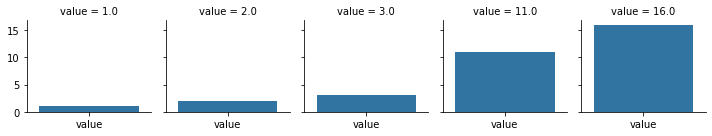

In [ ]:
# We can do tidy's graph
import seaborn as sns
sns.catplot(col='value', 
            kind='bar', data=tidy, height=2);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# This is given us a product_name we need to calculate its order_hour_of_day pattern.

products = pd.read_csv('products.csv')
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')

In [ ]:
# Subset and Merge

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']


products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

orders.columns.to_list()

order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']


merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()


condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

In [ ]:
##### YOUR CODE HERE #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [ ]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

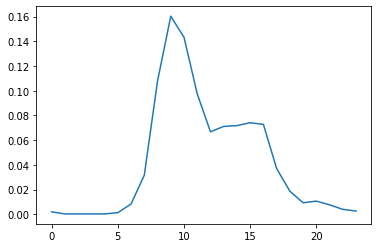

In [ ]:
cream['order_hour_of_day'].value_counts(normalize = True).sort_index().plot();

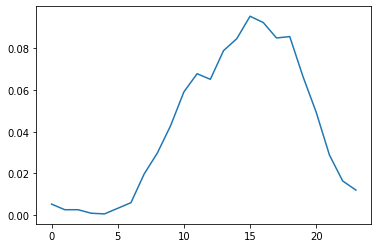

In [ ]:
(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

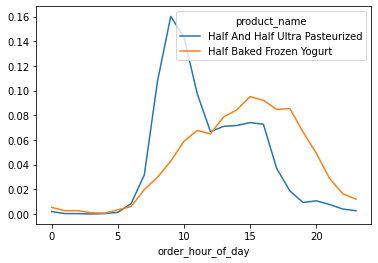

In [ ]:
pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns').plot();

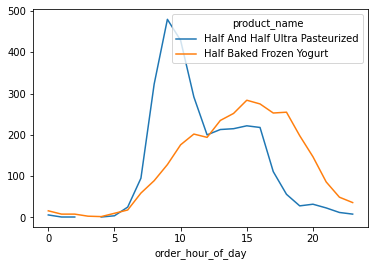

In [ ]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot();

In [ ]:
table = pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize=True)
table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [ ]:

melted = table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={'order_hour_of_day': 'Hour of Day Ordered', 'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


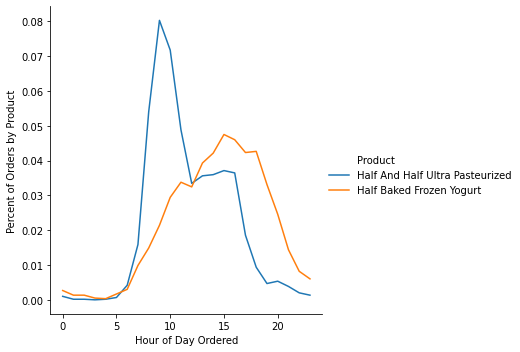

In [ ]:

sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');